# Assignment 1 - Machine Learning Models

## Name- Rohan Subhash Yewale
## NUID- 001087414

Use three different algorithms to create predictive models and interpret them.


**Did I explain my idea clearly? (10 Points)**<br/>
How effective are you at explaining what you are doing? You MUST write an abstract and a conclusion.<br/>


**Did I explain my evaluation clearly? (15 Points)**<br/>
Just saying "accuracy" is not a clear explanation of an evaluation scheme. Clearly explain the evaluation scheme. Do the metrics make sense? You MUST explain how you are preventing overfitting.

Tables, graphs, and charts must support your evaluation.<br/>

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . **(5 Points)**<br/>

**Public dataset (5 Points)**<br/>
Pick a public dataset that can be used for linear and logistic regression. You MUST get approval for your dataset from the TAs.

**What code is yours and what have you adapted? (10 Points)**<br/>
You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.<br/>

**Did I explain my code clearly? (15 Points)**<br/>
Your code review score will be scaled to a range of 0 to 10 and be used for this score.

**Did I explain my licensing clearly? (5 Points)**<br/> Failure to cite a clear license will result in a zero for this section.

# Abstract

## Predicting Bank Loan Status via Classification

We have the information about the borrowers who has taken a loan from the bank/financial organization.

We'll explore features like credit score, annual income, years of employment, mortage,monthly debt and try to train our classifer predict whether the loan would be paid off or not by the borrower.

## Dataset
link - https://www.kaggle.com/zaurbegiev/my-dataset

The dataset contains the borrowers features like </br>

* Loan Status
* Current Loan Amount
* Term
* Credit Score
* Annual Income
* Years in current job
* Home Ownership
* Purpose
* Monthly Debt
* Years of Credit History
* Months since last delinquent
* Number of Open Accounts
* Number of Credit Problems
* Current Credit Balance
* Maximum Open Credit
* Bankruptcies
* Tax Liens

This gives us the background check of the borrower and the idea of the borrowers financial stability.

In [389]:
#  Libraries needed
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn
#pip install sklearn

In [258]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing, CSV file I/O (e.g pd.read_csv)
%matplotlib inline 
import matplotlib.pyplot as plt

In [259]:
from scipy import stats
import seaborn as sns

In [260]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
url = 'https://raw.githubusercontent.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/master/Assignment1/Bank%20Loan%20Status%20Dataset/credit_train.csv'
df_credit = pd.read_csv(url)
df_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [263]:
df_credit.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [264]:
# Total number of Rows and Columns
df_credit.shape

(100514, 19)

Lets see the column data types and non-missing values

In [265]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

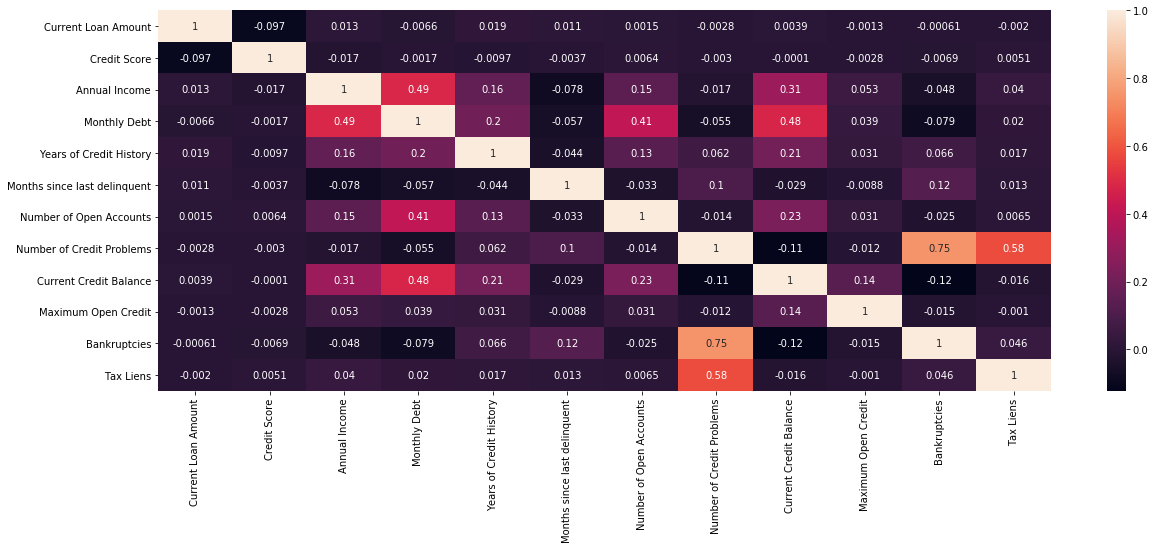

In [177]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_credit.corr(), annot=True)

There are 7 object features that we'll need to work, so that we'll be able to use them in a model.

Loan ID, Customer ID are identification columns, we can drop these columns

Loan Status is a categorical variable having values 'Fully paid' or 'Charged off'.
This is our target variable and we'll aim to predict this value.

In [266]:
df_credit['Loan Status'].value_counts(normalize = True)

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

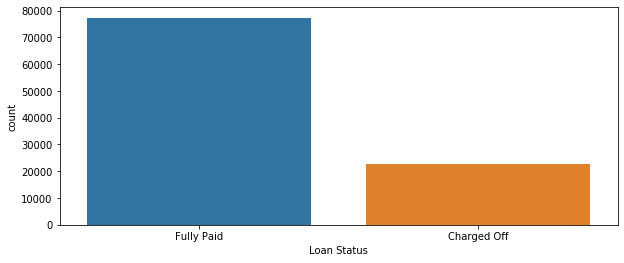

In [267]:
plt.figure(figsize=(10,4))
sns.countplot(df_credit['Loan Status'])

## Handling Credit Score

In [268]:
#Statistics for each numerical column
df_credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Credit Score is usually within the range of 300-850 but we can see that the mean score is 1076 and max value is 7510.
Let's check the total number of rows with credit score greater than 800

In [269]:
df_credit_score = df_credit[df_credit['Credit Score']>850]

In [270]:
df_credit_score.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0


It seems that some of the credit scores are scaled up by 10. We'll scale them back by dividing it by 10 so that all the values are in the same range

In [271]:
# if the credit score is greater than 850, we'll divide it by 10
df_credit['Credit Score'] = df_credit['Credit Score'].apply(lambda x: (x/10) if x>850 else x)

In [272]:
df_credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Now we can see that the credit score is within 850

In [273]:
df_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## Handling NaN/Missing Values

In [274]:
df_credit.shape

(100514, 19)

In [275]:
df_credit.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [276]:
df_null_percent = 100*(df_credit.isnull().sum()/len(df_credit))

In [277]:
df_null_percent

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

Column-**'Months since last delinquent'** more than 50% values are null/missing so we'll drop this column

In [278]:
df_credit.drop(columns=['Loan ID','Customer ID','Months since last delinquent'], axis=1, inplace=True)

As we can see many columns have same number of null/missing values(514).Let's check

In [279]:
df_credit[df_credit['Loan Status'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that last 514 rows are NaN.Let's drop last 514 rows

In [280]:
df_credit.drop(df_credit.tail(514).index, inplace=True)

In [281]:
df_credit.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

'Maximum Open Credit',
'Bankruptcies',                   
'Tax Liens',  
missing values are low we'll drop NaN values.

In [282]:
df_credit.dropna(subset=['Maximum Open Credit', 'Bankruptcies',
'Tax Liens'],inplace=True)

In [283]:
df_null_percent = 100*(df_credit.isnull().sum()/len(df_credit))
df_null_percent

Loan Status                   0.000000
Current Loan Amount           0.000000
Term                          0.000000
Credit Score                 19.150450
Annual Income                19.150450
Years in current job          4.230715
Home Ownership                0.000000
Purpose                       0.000000
Monthly Debt                  0.000000
Years of Credit History       0.000000
Number of Open Accounts       0.000000
Number of Credit Problems     0.000000
Current Credit Balance        0.000000
Maximum Open Credit           0.000000
Bankruptcies                  0.000000
Tax Liens                     0.000000
dtype: float64

Looks like 4.2% of 'Years in current job' values are missing. Let's check 

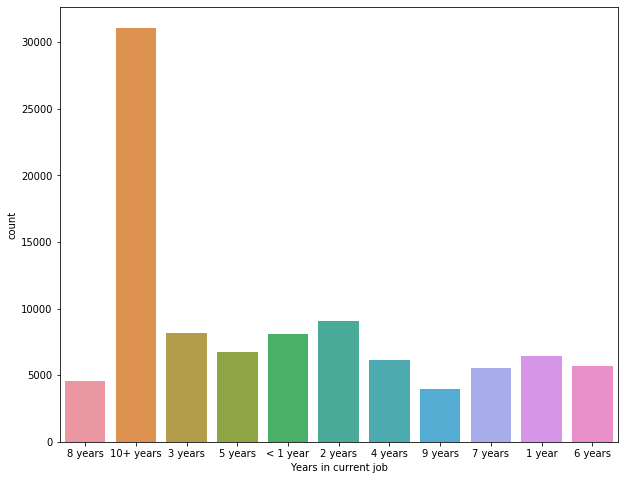

In [284]:
plt.figure(figsize=(10,8))
sns.countplot(df_credit['Years in current job'])

Clearly the number of '10+ years' are way more greater than any other values.


We'll convert 'Years in current job' column into numerical data

In [285]:
df_credit['Years in current job']=df_credit['Years in current job'].str.extract(r"(\d+)")
df_credit['Years in current job'] = df_credit['Years in current job'].astype(float)

In [286]:
df_credit['Years in current job'].value_counts()

10.0    31090
1.0     14550
2.0      9104
3.0      8151
5.0      6778
4.0      6132
6.0      5676
7.0      5573
8.0      4569
9.0      3949
Name: Years in current job, dtype: int64

Let's fill NaN with the mean value

In [287]:
mean_job = df_credit['Years in current job'].mean()

In [288]:
mean_job

5.9817624408822665

In [289]:
df_credit['Years in current job'].fillna(mean_job, inplace=True)

In [300]:
df_credit[df_credit['Credit Score'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
4,1,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
7,0,648714.0,Long Term,NaN,NaN,1.0,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
11,1,541970.0,Short Term,NaN,NaN,10.0,Home Mortgage,Home Improvements,23568.55,23.2,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,1,449020.0,Long Term,NaN,NaN,9.0,Own Home,Debt Consolidation,18904.81,19.4,8.0,0.0,334533.0,428956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,1,431860.0,Long Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,8465.07,18.5,5.0,0.0,241319.0,476806.0,0.0,0.0
99982,1,484968.0,Long Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,20941.80,23.7,15.0,0.0,804175.0,1322662.0,0.0,0.0
99988,0,309474.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0
99989,0,429132.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,28948.02,16.3,16.0,0.0,485279.0,656414.0,0.0,0.0


It looks like some of the borrowers have the Credit Score and Annual Income missing.
One way of dealing with the missing Annual Income & Credit Score is to replace with the mean value.
Since these two features are important for our prediction we'll not be adjusting, so that the model learns on actual data instead of some assumed data.

In [301]:
df_credit.dropna(inplace=True)

## Encoding Target Variable

In [290]:
df_credit['Loan Status'].value_counts()

Fully Paid     77207
Charged Off    22587
Name: Loan Status, dtype: int64

Transforming Target Variable using LabelEncoder()<br/>
We use LabelEncoder() only for the target variables(y) and not for the input variables(x)

In [291]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1

In [292]:
df_credit['Loan Status'] = le.fit_transform(df_credit['Loan Status'])

In [293]:
df_credit.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [294]:
df_credit['Loan Status'].value_counts()

1    77207
0    22587
Name: Loan Status, dtype: int64

## EDA

In [302]:
df_eda = df_credit.copy()

In [303]:
df_eda.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,Short Term,729.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


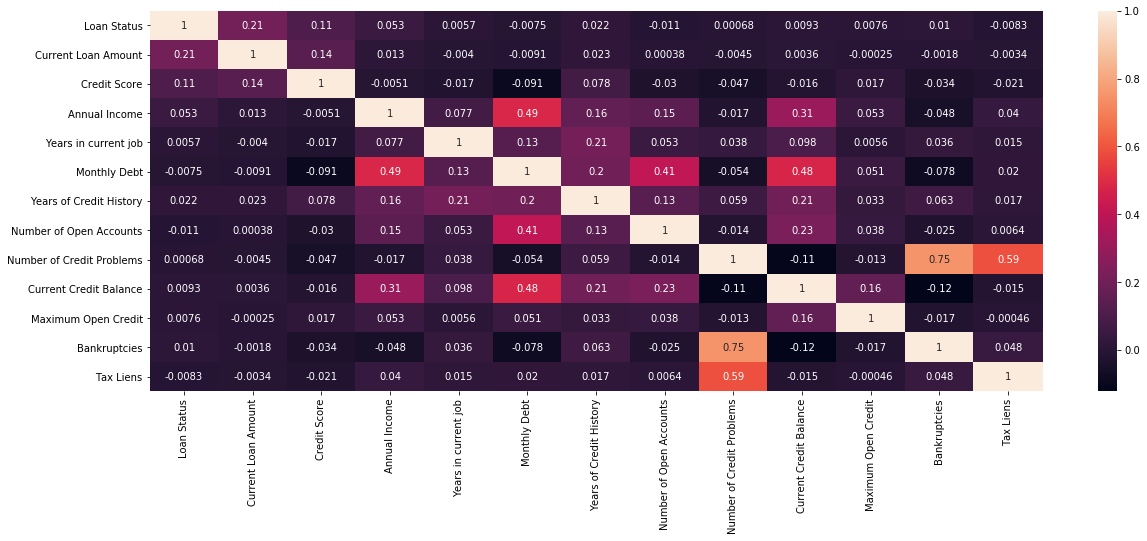

In [304]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df_eda.corr(), annot=True)

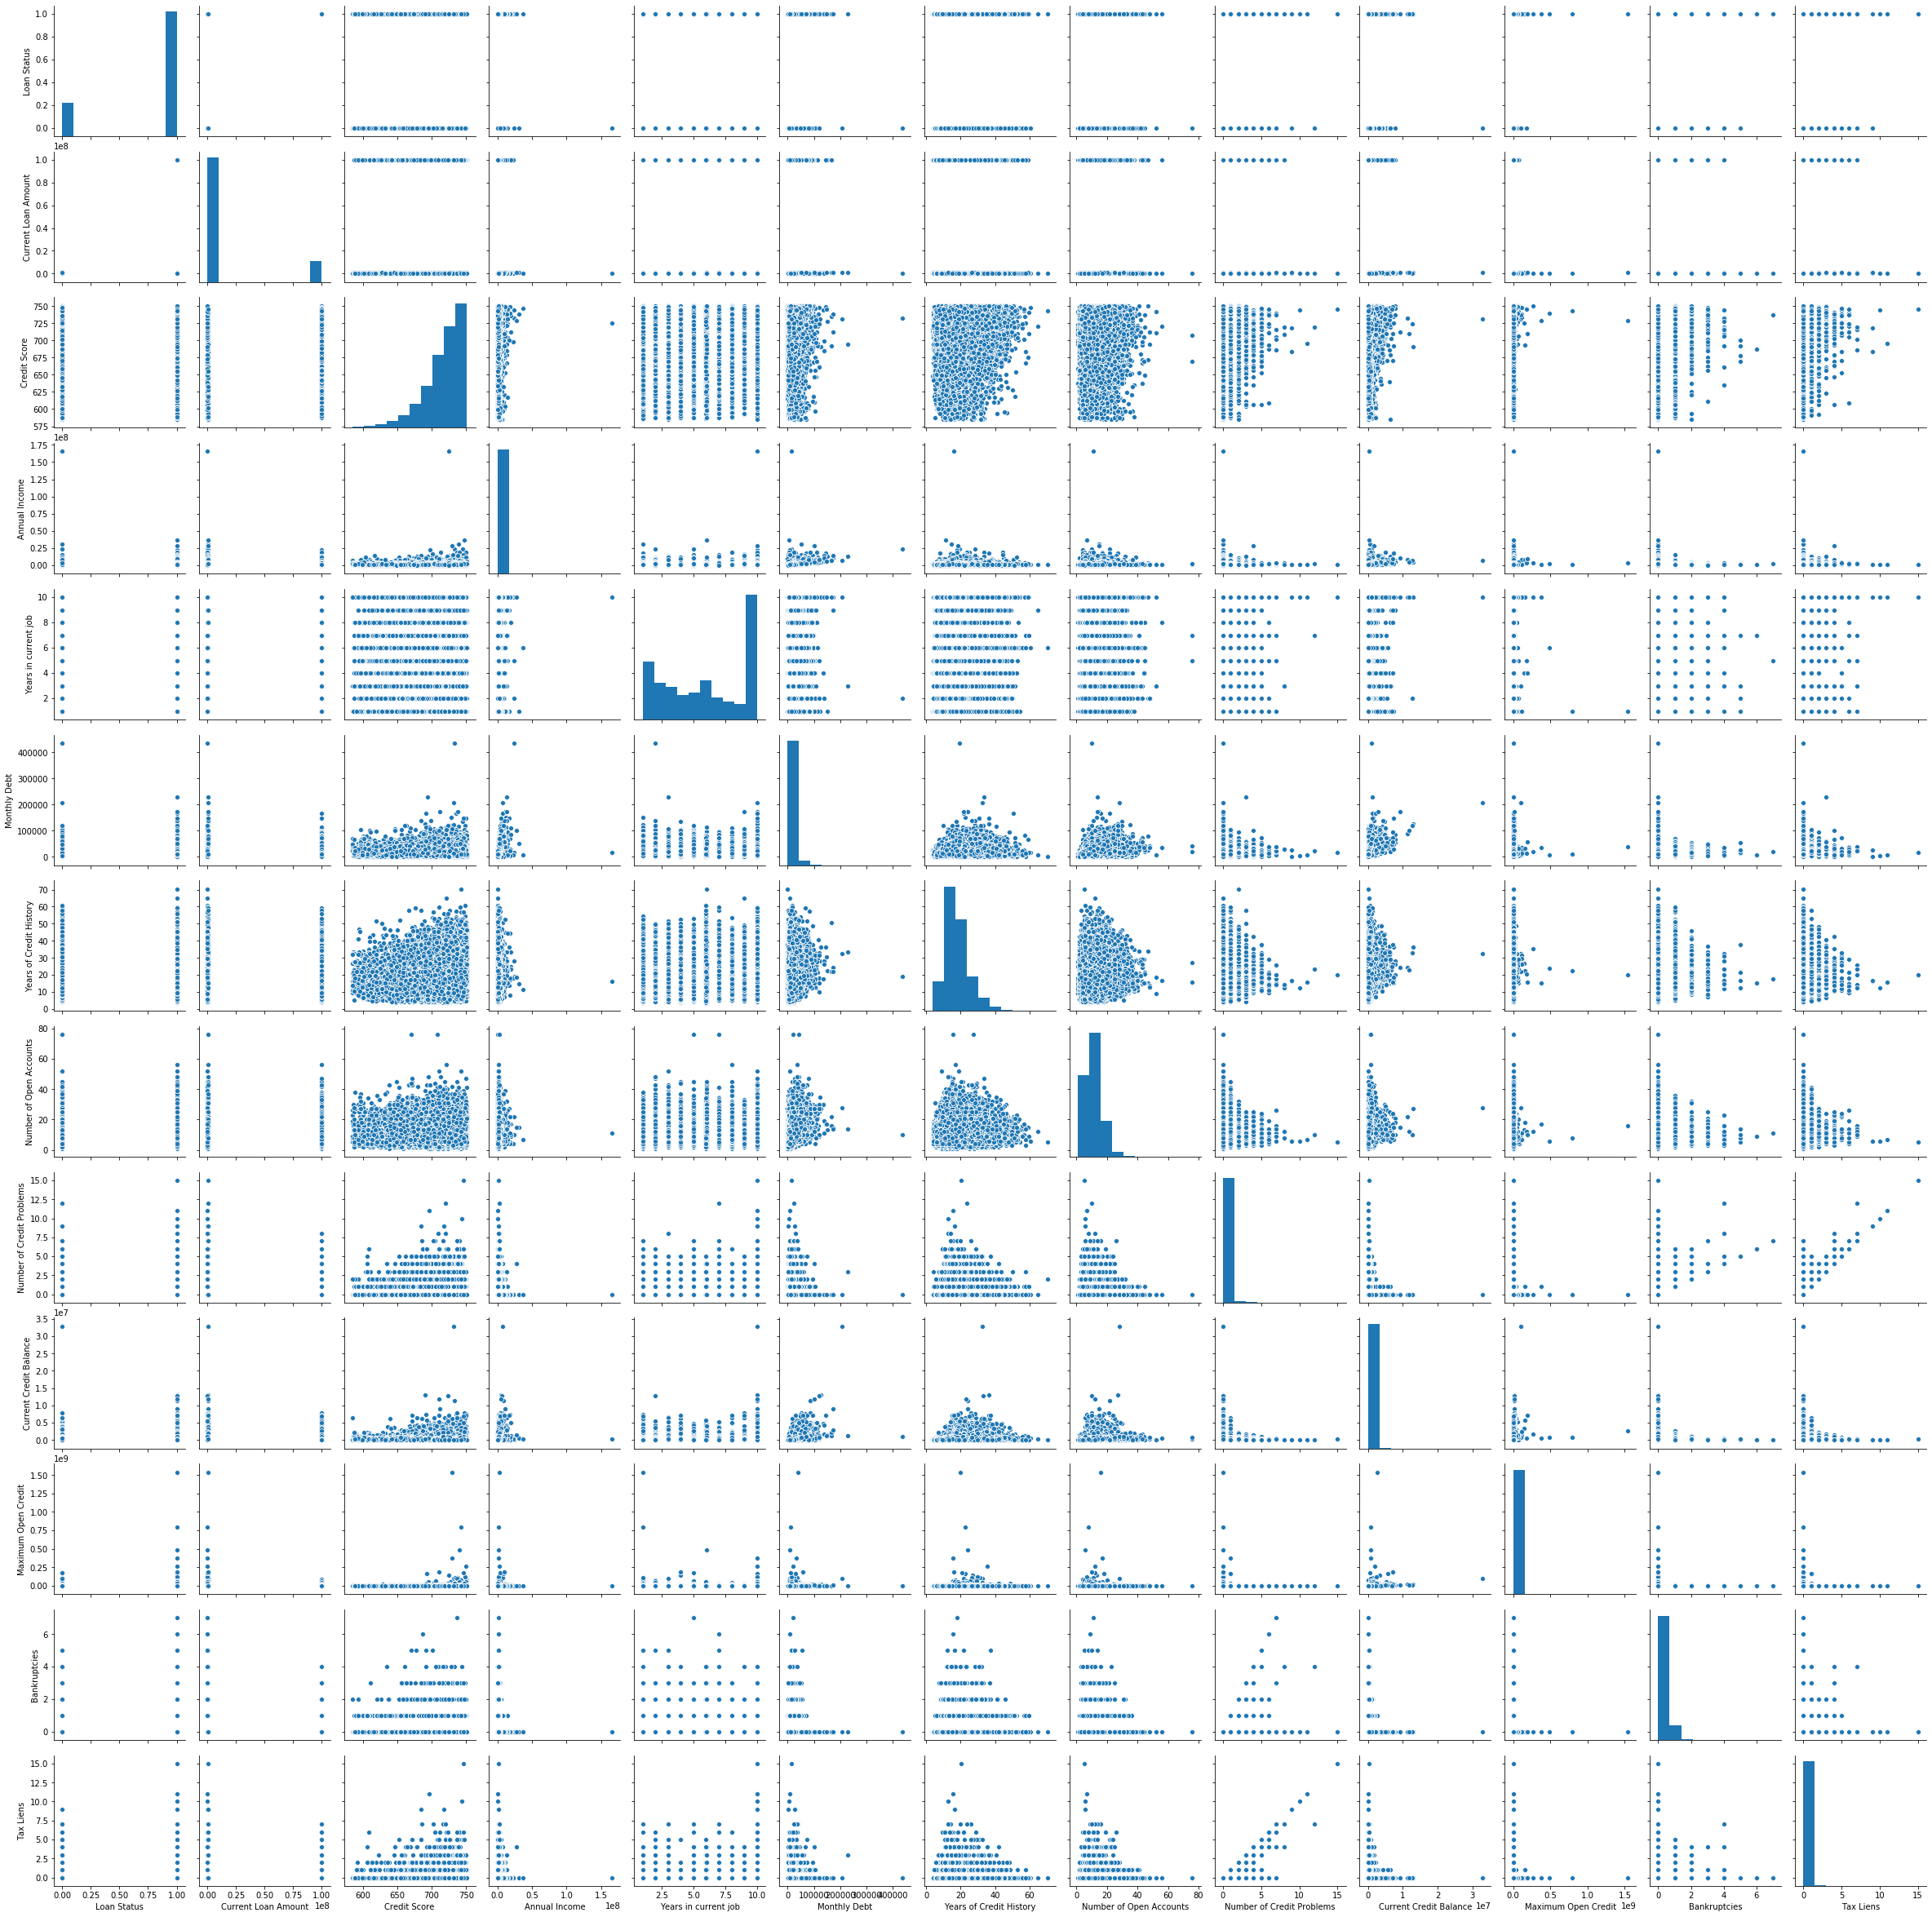

In [305]:
sns.pairplot(df_eda)

In [306]:
df_eda.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [308]:

#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(df_eda['Loan Status'], df_eda[['Loan Status', 'Current Loan Amount', 'Credit Score',
       'Annual Income', 'Years in current job',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan Status   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.896e+28
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                        0.00
Time:                        21:43:31   Log-Likelihood:                      2.1986e+06
No. Observations:               80683   AIC:                                 -4.397e+06
Df Residuals:                   80670   BIC:                                 -4.397e+06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Loan Status                   1.0000   3.13e-15   3.19e+14      0.000       1.000       1.000
Current Loan Amount       -2.145e-22   3.67e-23     -5.849      0.000   -2.86e-22   -1.43e-22
Credit Score              -1.986e-18   7.09e-18     -0.280      0.779   -1.59e-17    1.19e-17
Annual Income              3.275e-20   1.34e-21     24.503      0.000    3.01e-20    3.54e-20
Years in current job      -2.526e-17   3.74e-16     -0.068      0.946   -7.58e-16    7.07e-16
Monthly Debt               -3.64e-20   1.37e-19     -0.267      0.790   -3.04e-19    2.31e-19
Years of Credit History   -2.002e-17   1.89e-16     -0.106      0.916    -3.9e-16     3.5e-16
Number of Open Accounts   -2.765e-17   2.73e-16     -0.101      0.919   -5.63e-16    5.07e-16
Number of Credit Problems  1.638e-15   7.07e-15      0.232      0.817   -1.22e-14    1.55e-14
Current Credit Balance    -6.634e-21   3.85e-21     -1.724      0.085   -1.42e-20     9.1e-22
Maximum Open Credit        -5.13e-20   1.83e-22   -279.769      0.000   -5.17e-20   -5.09e-20
Bankruptcies               9.177e-16    7.9e-15      0.116      0.908   -1.46e-14    1.64e-14
Tax Liens                  5.065e-16   8.62e-15      0.059      0.953   -1.64e-14    1.74e-14
==============================================================================
Omnibus:                   373227.321   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    3719259832186.335
Skew:                         164.914   Prob(JB):                         0.00
Kurtosis:                   33262.944   Cond. No.                     3.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

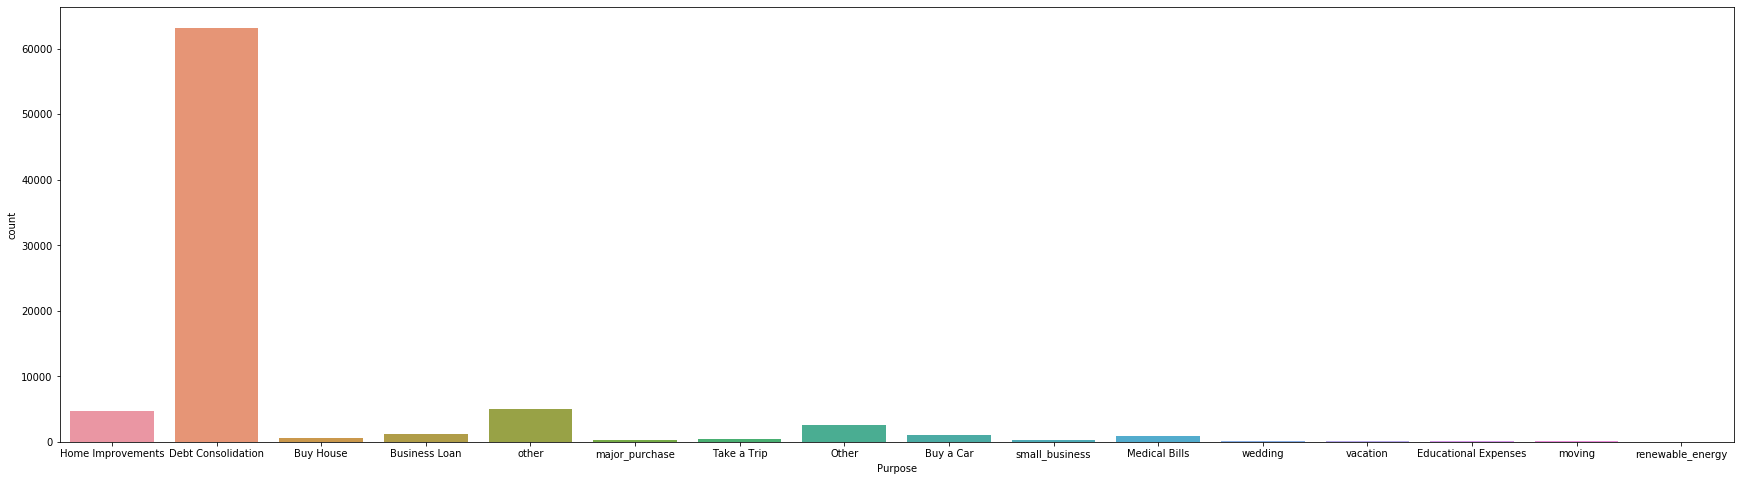

In [309]:
plt.figure(figsize=(30,8))
sns.countplot(df_eda['Purpose'])

We can see that most of the borrowers have taken loan for the Deft Consolidation Purpose

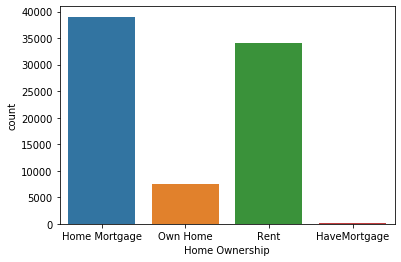

In [311]:
sns.countplot(df_credit['Home Ownership'])

It looks like people who have home mortgage or live in rent have taken loan.

In [310]:
df_credit.drop(['Purpose'],axis=1,inplace=True)

## Categorizing Columns

As our range of 'Years in job' is between 1-10+ we can categorize it into groups on the basis of their number of work experience.

In [312]:
df_credit['Work Experience'] = df_credit['Years in current job'].apply(lambda x:"Entry Level" if x < 4 else ("Mid Level" if x>4 and x<8 else "Senior Level"))

In [313]:
df_credit.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Work Experience
0,1,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,Senior Level
2,1,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,Senior Level
3,1,347666.0,Long Term,721.0,806949.0,3.0,Own Home,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Entry Level
5,0,206602.0,Short Term,729.0,896857.0,10.0,Home Mortgage,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,Senior Level
6,1,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,Entry Level


In [314]:
df_credit.drop(['Years in current job'],axis=1,inplace=True)

### Credit Score
In the Same we'll categorize the Credit Score,<br/> according to the Experian the Credit Score is categorized in the following<br/>
* 580-669:   	Fair	
* 670-739:	    Good	
* 740-799:	    Very Good
* 800-850:	    Exceptional

In [315]:
df_credit.loc[df_credit['Credit Score']<580,'Credit Score Range'] = "Poor"
df_credit.loc[(df_credit['Credit Score']>=580) & (df_credit['Credit Score'] < 670) ,'Credit Score Range'] = "Fair"
df_credit.loc[(df_credit['Credit Score']>=670) & (df_credit['Credit Score'] < 740) ,'Credit Score Range'] = "Good"
df_credit.loc[(df_credit['Credit Score']>=740) & (df_credit['Credit Score'] < 800) ,'Credit Score Range'] = "Very Good"
df_credit.loc[(df_credit['Credit Score']>=800) & (df_credit['Credit Score'] < 851) ,'Credit Score Range'] = "Exceptional"

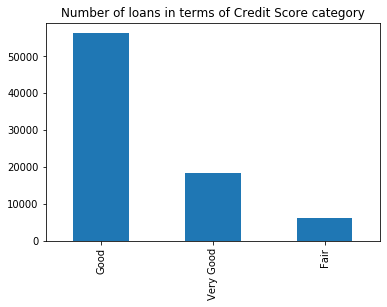

In [316]:
df_credit['Credit Score Range'].value_counts().plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [317]:
df_credit.drop(['Credit Score'],axis=1,inplace=True)

In [318]:
df_credit.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Home Ownership,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Work Experience,Credit Score Range
0,1,445412.0,Short Term,1167493.0,Home Mortgage,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,Senior Level,Good
2,1,99999999.0,Short Term,2231892.0,Own Home,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,Senior Level,Very Good
3,1,347666.0,Long Term,806949.0,Own Home,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,Entry Level,Good
5,0,206602.0,Short Term,896857.0,Home Mortgage,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,Senior Level,Good
6,1,217646.0,Short Term,1184194.0,Home Mortgage,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,Entry Level,Good


## Number of Credit Problems

We'll categorize the number of credit problems.

In [319]:
df_credit['Number of Credit Problems'].value_counts()

0.0     69308
1.0      9830
2.0      1060
3.0       307
4.0       101
5.0        43
6.0        16
7.0         7
8.0         4
9.0         2
11.0        2
15.0        1
12.0        1
10.0        1
Name: Number of Credit Problems, dtype: int64

In [320]:
df_credit['Credit Problems'] = df_credit['Number of Credit Problems'].apply(lambda x: 'No Credit Problem' if x==0 else("Low Credit Problems" if x>0 and x<5 else "High Credit Problems"))

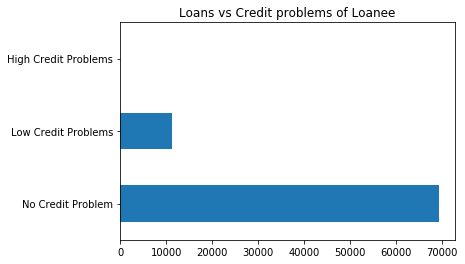

In [321]:
df_credit['Credit Problems'].value_counts().plot(kind='barh', title="Loans vs Credit problems of Loanee")

We can assume that the loan is not given to the borrower with High Number of Credit Problems

In [322]:
df_credit.drop(['Number of Credit Problems'],axis=1,inplace=True)

## Years of Credit History

Another important feature for financial stability identification is the years of credit history. We look at the given credit age of individuals and categorize them using one hot encoding.

In [323]:
df_credit['Years of Credit History']

0        17.2
2        14.9
3        12.0
5        17.3
6        19.6
         ... 
99995    22.3
99996     9.4
99997    18.8
99998    15.0
99999    13.0
Name: Years of Credit History, Length: 80683, dtype: float64

In [324]:
df_credit['Credit History Years'] = df_credit['Years of Credit History'].apply(lambda x: "Short Credit History" if x<5 else ("Good Credit History" if x>5 and x<17 else "Exceptional Credit History"))

In [325]:
df_credit.drop(['Years of Credit History'],axis=1,inplace=True)

## Tax Liens

A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.

In [326]:
df_credit['Tax Liens'].value_counts()

0.0     79097
1.0      1102
2.0       311
3.0        85
4.0        49
5.0        15
6.0        11
7.0         7
9.0         2
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [327]:
df_credit['Tax Liens'] = df_credit['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Low Tax Liens" if x>0 and x<3 else "High Tax Liens"))

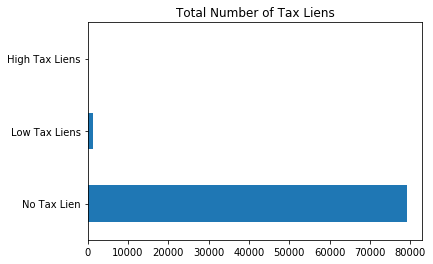

In [328]:
df_credit['Tax Liens'].value_counts().plot(kind='barh',title='Total Number of Tax Liens')

This gives us the information about previous commitments of the loanee.<br/>
Usually loans are not provided to the loanee with high number of liens on their property by court.

## Bankruptcies

In [329]:
df_credit['Bankruptcies'].value_counts()

0.0    71695
1.0     8545
2.0      331
3.0       81
4.0       22
5.0        6
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [330]:
df_credit['Bankruptcies'] = df_credit['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Low Bankruptcies" if x>0 and x<3 else "High Bankruptcies"))

In [331]:
df_credit.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Home Ownership,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Work Experience,Credit Score Range,Credit Problems,Credit History Years
0,1,445412.0,Short Term,1167493.0,Home Mortgage,5214.74,6.0,228190.0,416746.0,Low Bankruptcies,No Tax Lien,Senior Level,Good,Low Credit Problems,Exceptional Credit History
2,1,99999999.0,Short Term,2231892.0,Own Home,29200.53,18.0,297996.0,750090.0,No bankruptcies,No Tax Lien,Senior Level,Very Good,Low Credit Problems,Good Credit History
3,1,347666.0,Long Term,806949.0,Own Home,8741.90,9.0,256329.0,386958.0,No bankruptcies,No Tax Lien,Entry Level,Good,No Credit Problem,Good Credit History
5,0,206602.0,Short Term,896857.0,Home Mortgage,16367.74,6.0,215308.0,272448.0,No bankruptcies,No Tax Lien,Senior Level,Good,No Credit Problem,Exceptional Credit History
6,1,217646.0,Short Term,1184194.0,Home Mortgage,10855.08,13.0,122170.0,272052.0,Low Bankruptcies,No Tax Lien,Entry Level,Good,Low Credit Problems,Exceptional Credit History


In [332]:
df_credit.describe()

,Loan Status,Current Loan Amount,Annual Income,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
count,80683.000000,8.068300e+04,8.068300e+04,80683.000000,80683.000000,8.068300e+04,8.068300e+04
mean,0.787179,1.446983e+07,1.378339e+06,18522.951345,11.146375,2.950848e+05,7.344371e+05
std,0.409304,3.479592e+07,1.080910e+06,12231.211680,5.027878,3.815784e+05,6.895080e+06
min,0.000000,1.542200e+04,7.662700e+04,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,1.000000,1.866480e+05,8.491100e+05,10260.190000,8.000000,1.127460e+05,2.719860e+05
50%,1.000000,3.247640e+05,1.174371e+06,16264.190000,10.000000,2.104440e+05,4.664000e+05
75%,1.000000,5.497800e+05,1.650701e+06,24059.890000,14.000000,3.682485e+05,7.798120e+05
max,1.000000,1.000000e+08,1.655574e+08,435843.280000,76.000000,3.287897e+07,1.539738e+09


Let's convert 'Annual Income' and 'Current Loan Amount' into discrete values.<br/>
To handle the outliers we'll have to set up some Lower and Higher boundary.<br/>
Lower boundary = Mean - 1 Standard Deviation<br/>
High boundary = Mean + 1 Standard Deviation<br/>

In [333]:
meanoutlier =df_credit[df_credit['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stdoutlier = df_credit[df_credit['Annual Income'] < 99999999.00 ]['Annual Income'].std()
low_income = meanoutlier - stdoutlier
high_income = meanoutlier + stdoutlier

In [334]:
low_income

462911.6378167514

In [335]:
high_income

2289696.68319661

In [336]:
df_credit['Annual Income'] = df_credit['Annual Income'].apply(lambda x: "Low Income" if x<=low_income else ("Average Income" if x>low_income and x<high_income else "High Income"))

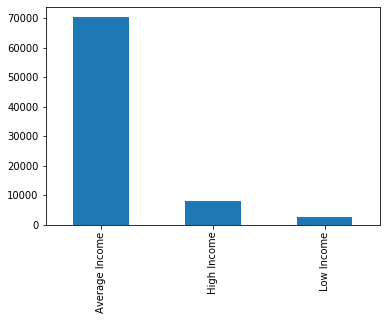

In [337]:
df_credit['Annual Income'].value_counts().plot(kind='bar')

Similarly we'll do for the 'Current Loan Amount' and we'll categorize it.

In [338]:
meanoutlier =df_credit[df_credit['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
stdoutlier = df_credit[df_credit['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
low_loan = meanoutlier - stdoutlier
high_loan = meanoutlier + stdoutlier

In [339]:
low_loan

126869.07831003694

In [340]:
high_loan

502057.5027433245

In [341]:
df_credit['Current Loan Amount'] = df_credit['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=low_loan else ("Medium Loan" if x>low_loan and x<high_loan else "Big Loan"))

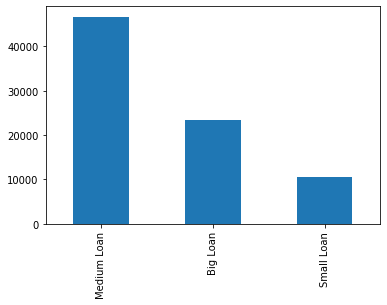

In [342]:
df_credit['Current Loan Amount'].value_counts().plot(kind='bar')

In [343]:
df_credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Annual Income',
       'Home Ownership', 'Monthly Debt', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Work Experience', 'Credit Score Range', 'Credit Problems',
       'Credit History Years'],
      dtype='object')

## Dummy Variables

In [345]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns

df_categorical = df_credit[[ 'Current Loan Amount', 'Term', 'Annual Income',
       'Home Ownership','Bankruptcies',
       'Tax Liens', 'Work Experience', 'Credit Score Range', 'Credit Problems',
       'Credit History Years']]

In [346]:
# One hot encode
df_categorical = pd.get_dummies(df_categorical)

In [347]:
df_categorical

,Current Loan Amount_Big Loan,Current Loan Amount_Medium Loan,Current Loan Amount_Small Loan,Term_Long Term,Term_Short Term,Annual Income_Average Income,Annual Income_High Income,Annual Income_Low Income,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,...,Work Experience_Senior Level,Credit Score Range_Fair,Credit Score Range_Good,Credit Score Range_Very Good,Credit Problems_High Credit Problems,Credit Problems_Low Credit Problems,Credit Problems_No Credit Problem,Credit History Years_Exceptional Credit History,Credit History Years_Good Credit History,Credit History Years_Short Credit History
0,0,1,0,0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5,0,1,0,0,1,1,0,0,0,1,...,1,0,1,0,0,0,1,1,0,0
6,0,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
99996,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
99997,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
99998,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [348]:
df_credit.drop(['Current Loan Amount', 'Term', 'Annual Income',
       'Home Ownership','Bankruptcies',
       'Tax Liens', 'Work Experience', 'Credit Score Range', 'Credit Problems',
       'Credit History Years'],axis=1,inplace=True)

In [349]:
df_credit = pd.concat([df_credit,df_categorical],axis=1)

In [350]:
df_credit.head()

,Loan Status,Monthly Debt,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Current Loan Amount_Big Loan,Current Loan Amount_Medium Loan,Current Loan Amount_Small Loan,Term_Long Term,Term_Short Term,...,Work Experience_Senior Level,Credit Score Range_Fair,Credit Score Range_Good,Credit Score Range_Very Good,Credit Problems_High Credit Problems,Credit Problems_Low Credit Problems,Credit Problems_No Credit Problem,Credit History Years_Exceptional Credit History,Credit History Years_Good Credit History,Credit History Years_Short Credit History
0,1,5214.74,6.0,228190.0,416746.0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,29200.53,18.0,297996.0,750090.0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,1,8741.90,9.0,256329.0,386958.0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,0,16367.74,6.0,215308.0,272448.0,0,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
6,1,10855.08,13.0,122170.0,272052.0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0


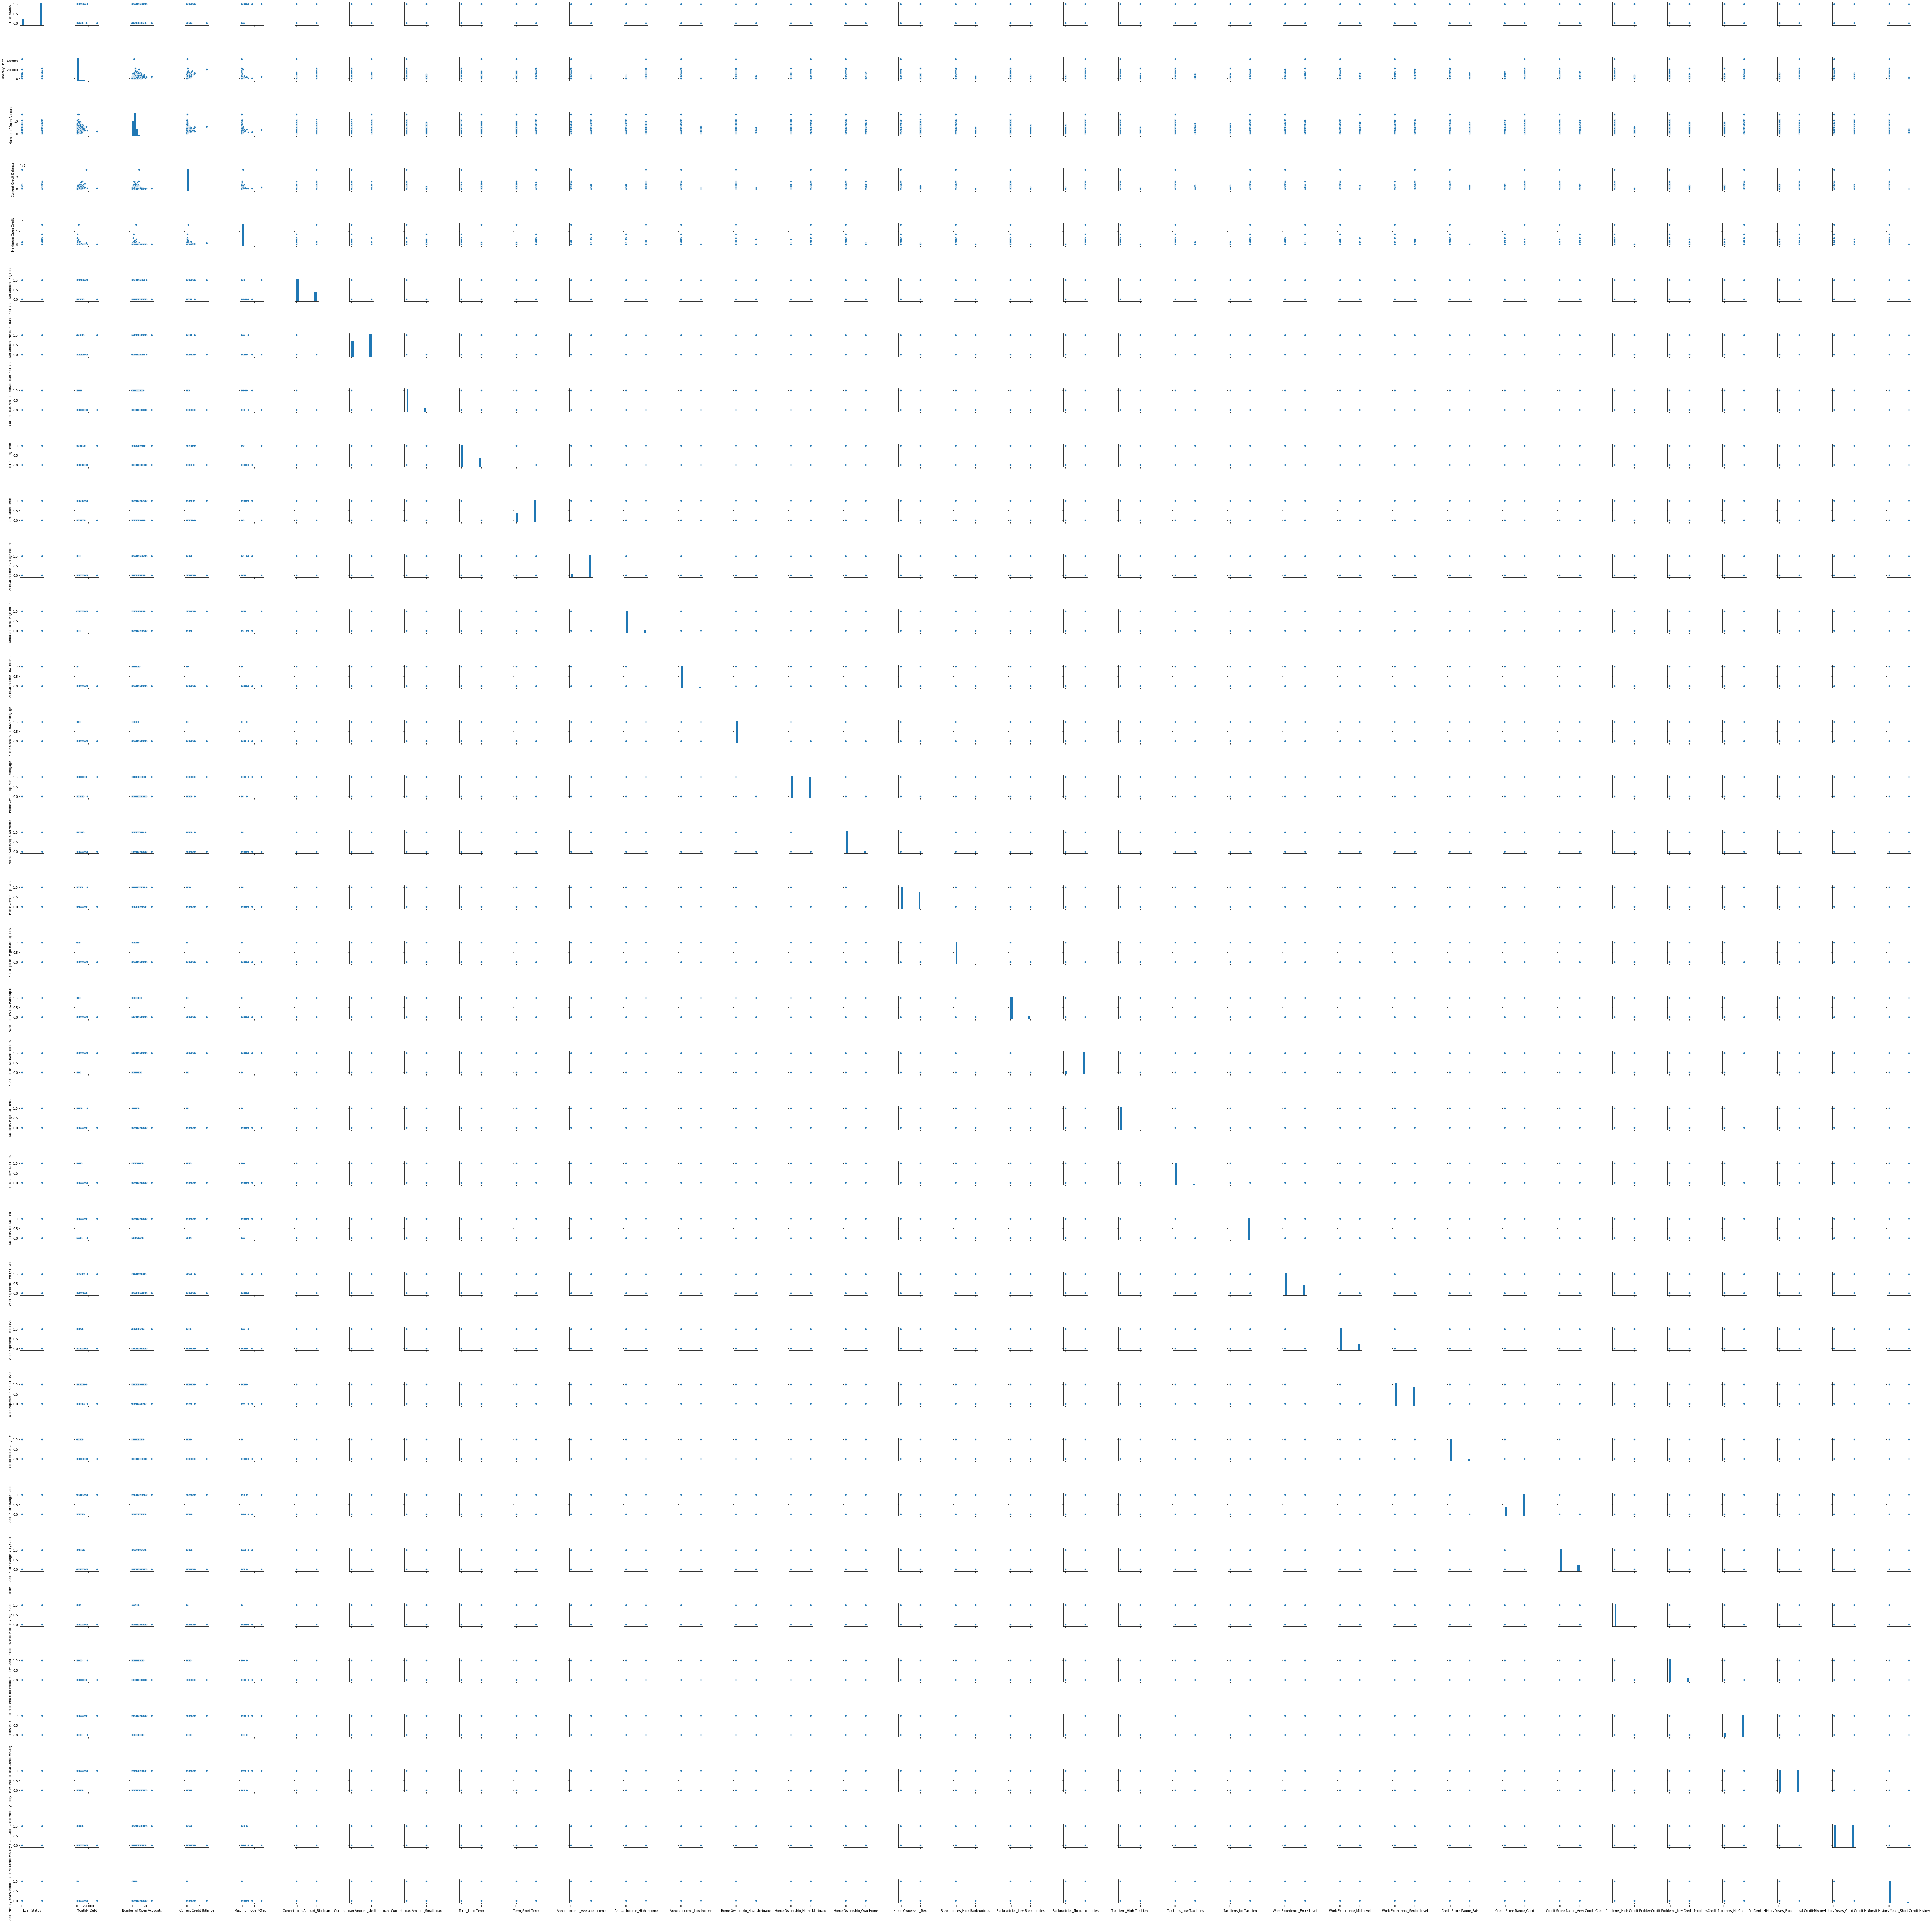

In [351]:
sns.pairplot(df_credit)

## Train Test Split

In [352]:
y = df_credit['Loan Status']
X = df_credit.drop(['Loan Status'],axis=1)

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model Evaluation and Fitting

We will compare three different machine learning Classification models:

1 - Logistic Regression<br/>
2 - Random Forest Classification<br/>
3 - Naive Bayes

In [387]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = df_credit.loc[:,df_credit.columns!='Loan Status']
y = df_credit[['Loan Status']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Monthly Debt', 'Current Credit Balance', 'Maximum Open Credit',
       'Current Loan Amount_Big Loan', 'Current Loan Amount_Medium Loan',
       'Term_Long Term', 'Term_Short Term', 'Annual Income_High Income',
       'Credit Score Range_Fair', 'Credit Score Range_Very Good'],
      dtype='object')


### Logistic Regression

In [382]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression

In [383]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [384]:
predictions = logmodel.predict(X_test)

In [385]:
print("Accuracy Score: ",logmodel.score(X_test, y_test))

Accuracy Score:  0.787615884190174


In [386]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4284
           1       0.79      1.00      0.88     15887

    accuracy                           0.79     20171
   macro avg       0.39      0.50      0.44     20171
weighted avg       0.62      0.79      0.69     20171



C:\Users\rhnye\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [369]:
from sklearn.ensemble import RandomForestClassifier
randomrclass = RandomForestClassifier()
randomrclass.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [374]:
randomrpredictions = randomrclass.predict(X_test)

In [375]:
print("Accuracy Score: ",randomrclass.score(X_test, y_test))

Accuracy Score:  0.781815477665956


In [376]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report
print(classification_report(y_test,randomrpredictions))

              precision    recall  f1-score   support

           0       0.44      0.10      0.17      4284
           1       0.80      0.96      0.87     15887

    accuracy                           0.78     20171
   macro avg       0.62      0.53      0.52     20171
weighted avg       0.72      0.78      0.72     20171



### Decision Tree Classification

In [378]:
from sklearn.tree import DecisionTreeClassifier
decisionclass = DecisionTreeClassifier()
decisionclass.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [379]:
decisionpredictions = decisionclass.predict(X_test)

In [380]:
print("Accuracy Score: ",decisionclass.score(X_test, y_test))

Accuracy Score:  0.7227703138168659


In [381]:
#print the confusion matrix and classifier scores for the model
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,classification_report
print(classification_report(y_test,decisionpredictions))

              precision    recall  f1-score   support

           0       0.33      0.30      0.31      4284
           1       0.82      0.84      0.83     15887

    accuracy                           0.72     20171
   macro avg       0.57      0.57      0.57     20171
weighted avg       0.71      0.72      0.72     20171



## Questions
* Is the relationship significant?
Logistic Regression Accuracy - 79%<br/>
Random Forrest Accuracy - 78%<br/>
Decision Tree Classifier Accuracy - 72%<br/>
Due to high model accuracy the relationship seems significant<br/>

* Are any model assumptions violated?
In decision tree the features are preferred to be categorical, but there are some non categorical features in the model <br/>
Random Forrest -If the dependant variables of the model are linearly related then random forest may not work<br/>



* Is there any multicollinearity in the model?<br/>
Yes, there is multicollinearity as shown in the Correlation Pairplot<br/>


* In the multivariate models are predictor variables independent of all the other predictor variables?<br/>
Some of the predictor variables are independent. There is some dependancy between Bankruptcies and No. of Credit Problem,Annual Income, Monthly Debt<br/>


* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.<br/>
Insignificant Variables - 'Purpose','Number of Open Accounts',''Maximum Open Credit','Current Credit Balance'<br/>
Most Significant Predictor - 'Credit Score', 'Annual Income'<br/>


* Does the model make sense?<br/>
Yes, all the model predicts the Loan Status with more than 75% accuracy<br/>


* Does regularization help?<br/>
The sklearn Logistic Regression LogisticRegression() uses regularization by default<br/>


* Which independent variables are significant?<br/>
'Number of Credit Problem','Tax Liens','Bankruptcies'<br/>


* Which hyperparameters are important?<br/>
Logistic Regression:<br/>
"penalty" : Used to specify the norm used in the penalization.<br/>
"solver" : Algorithm to use in the optimization problem<br/>

Decision Trees :<br/>	
max_depth <br/>
max_features<br/>

Random Forest Classifier :<br/>

	
"max_depth": The maximum depth of the tree<br/>
"n_estimators": The number of trees in the forest




## Conclusion
Logistic Regression Accuracy - 79%<br/>
Random Forest Accuracy - 78%<br/>
Decision Tree Classifier Accuracy - 72%<br/>

After implementating different classification models we can say that Random Forest Classifier predicts the Bank Loan Status more accurately than the other 2 models.

## Citation

https://towardsdatascience.com/predictive-modeling-picking-the-best-model-69ad407e1ee7<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br/>
https://www.kaggle.com/zaurbegiev/my-dataset<br/>
https://pandas.pydata.org/pandas-docs/stable/index.html<br/>


## License

Copyright 2020 Rohan Subhash Yewale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.